In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,Normalization
import tensorflow as tf
from tensorflow.keras.datasets import mnist,

print(tf.__version__)

2.6.0


In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
print("X Train Max : {}".format(X_train.max()))
print("X Train Min : {}".format(y_train.min()))
print()
print("X Test Max : {}".format(X_test.max()))
print("X Test Min : {}".format(y_test.min()))

X Train Max : 255
X Train Min : 0

X Test Max : 255
X Test Min : 0


In [62]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [63]:
print("X Train Max : {}".format(X_train_scaled.max()))
print("X Train Min : {}".format(X_train_scaled.min()))
print()
print("X Test Max : {}".format(X_test_scaled.max()))
print("X Test Min : {}".format(X_test_scaled.min()))

X Train Max : 1.0
X Train Min : 0.0

X Test Max : 1.0
X Test Min : 0.0


In [64]:
print("X Train Shape : {}".format(X_train_scaled.shape))
print("Y Train Shape : {}".format(y_train.shape))
print()
print("X Test Shape : {}".format(X_test_scaled.shape))
print("Y Test Shape : {}".format(y_test.shape))

X Train Shape : (60000, 28, 28)
Y Train Shape : (60000,)

X Test Shape : (10000, 28, 28)
Y Test Shape : (10000,)


In [65]:
class_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
len(class_names)

10

In [66]:
def img_show(X,y, index):

    plt.figure(figsize = (15,6))
    plt.imshow(X[index])
    plt.title(class_names[y[index]], fontsize = 15)
    plt.axis("off")
    plt.show()

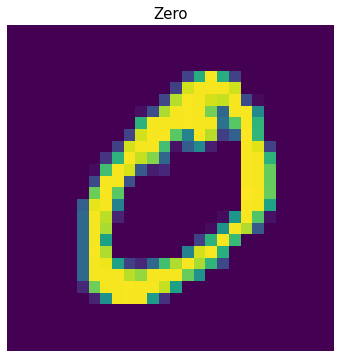

In [67]:
img_show(X_train_scaled, y_train, index = 1)

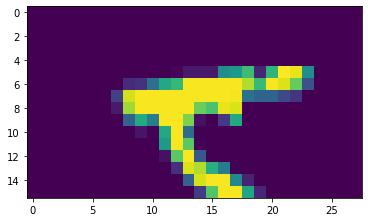

In [68]:
plt.imshow(X_train[0][:16])

In [69]:
X_train_scaled = X_train_scaled.reshape(60000,28,28,1)
X_test_scaled = X_test_scaled.reshape(10000,28,28,1)

In [76]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu", input_shape = (28,28,1), padding = "valid", strides = (1,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "valid", strides = (1,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))


model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [85]:
history = model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 128, verbose = 1, validation_data = (X_test_scaled, y_test))

Epoch 1/10
469/469 [==============================] - 37s 16ms/step - loss: 0.2215 - accuracy: 0.9312 - val_loss: 0.0525 - val_accuracy: 0.9820
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.0364 - val_accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0624 - accuracy: 0.9816 - val_loss: 0.0315 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0313 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0271 - val_accuracy: 0.992

In [86]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
loss, accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.0307 - accuracy: 0.9909


(0.0307417381554842, 0.9908999800682068)

In [87]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1),history.history["accuracy"], label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1),history.history["loss"],label = "Train")
    plt.plot(range(1,epochs+1),history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [91]:
def confusion_graph(y_true,y_pred, class_names = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, annot_kws = {"size" : 15}, cbar = False, cmap = "viridis", xticklabels= class_names, yticklabels = class_names, fmt = "d", linewidths=0.2, linecolor="white")
    size = 15
    plt.xlabel("Predicted", fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix", fontsize = size)
    plt.show()

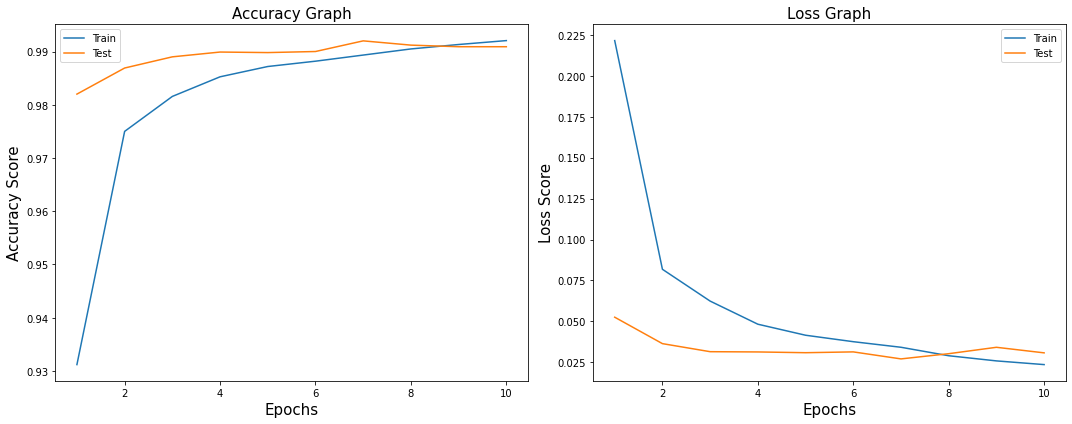

In [92]:
history_graph(history , 10)

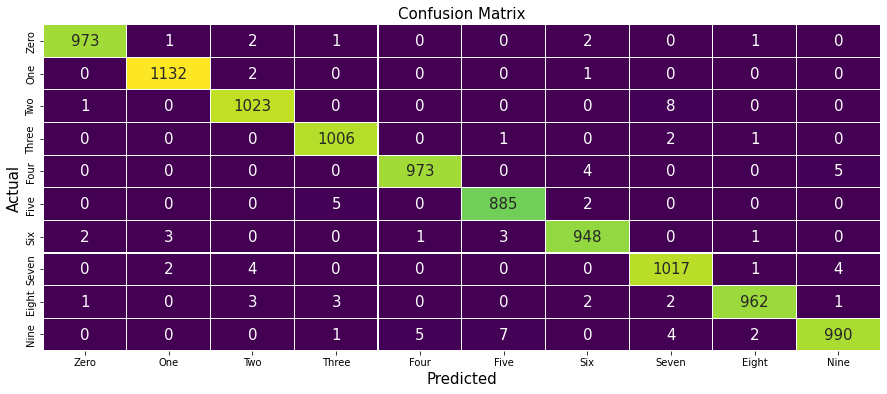

In [93]:
y_pred = model.predict(X_test_scaled)

y_pred_max = [np.argmax(i) for i in y_pred]

confusion_graph(y_test, y_pred_max, class_names)